#**Actividad: Análisis exploratorio con técnicas de agrupamiento**

Alejandro Pizarro || Matrícula: A01633784 || Viernes 08 de septiembre de 2023

###Librerias y cargar datos

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# clustering methods
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage

# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Distance metrics
from sklearn.metrics import pairwise_distances

####### Helper funtion for plotting #######
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)

    plt.show()

In [95]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje/datasets/country_data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


###0. Conjunto de datos

In [96]:
# Obtenemos la lista de las columnas
columnas = data.columns.tolist()
print(columnas)

['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


<ipython-input-94-4f7957be8907>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')


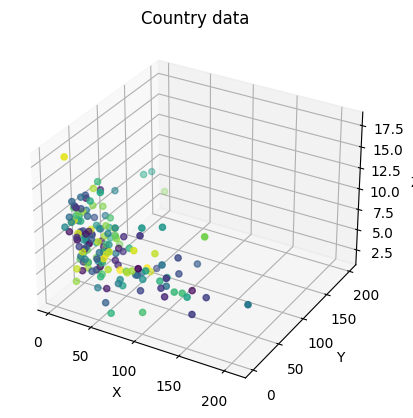

In [97]:
cmap = plt.get_cmap('viridis')
points = data[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']].values
labels = data['country']
colors = cmap(np.linspace(0, 1, len(labels)))
plot_data(points, colors, 'Country data')

###1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

----- K-means -----
Labels:  [0 9 9 0 3 3 0 1 1 9 7 5 0 3 9 1 9 0 0 0 9 9 3 2 9 0 0 0 0 1 0 0 0 3 9 9 0
 0 0 9 0 3 7 7 1 9 9 9 0 5 0 3 0 1 1 9 0 0 1 0 7 9 0 0 0 0 0 3 1 0 9 9 9 1
 7 7 9 1 9 3 0 0 2 0 0 3 3 0 0 3 3 4 9 0 0 3 9 0 7 0 9 0 0 0 9 0 0 0 9 0 1
 7 0 0 8 5 0 9 0 9 0 3 7 6 3 3 0 0 5 0 9 3 0 2 3 7 0 9 7 7 9 9 0 9 1 8 0 0
 9 0 0 0 9 3 9 0 0 2 1 1 3 0 0 3 0 0 0]
Centers:  [[7.06542857e+01 2.98571286e+01 6.24057143e+00 4.66895129e+01
  3.34218571e+03 1.03349429e+01 6.33071429e+01 4.17557143e+00
  1.50977143e+03]
 [4.31333333e+00 4.43400000e+01 1.08486667e+01 4.09933333e+01
  4.14533333e+04 1.14273333e+00 8.07466667e+01 1.81866667e+00
  4.68000000e+04]
 [8.17500000e+00 1.02950000e+02 3.27250000e+00 7.40000000e+01
  7.13750000e+04 1.00885000e+01 7.86250000e+01 1.76750000e+00
  3.88500000e+04]
 [1.13363636e+01 4.75227273e+01 6.53681818e+00 4.69000000e+01
  1.99318182e+04 7.32650000e+00 7.51181818e+01 1.86272727e+00
  1.18740909e+04]
 [2.80000000e+00 1.75000000e+02 7.77000000e+00 1.4200

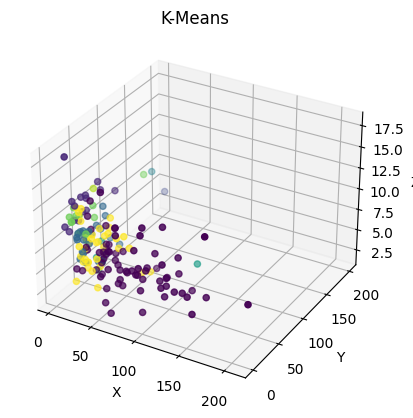

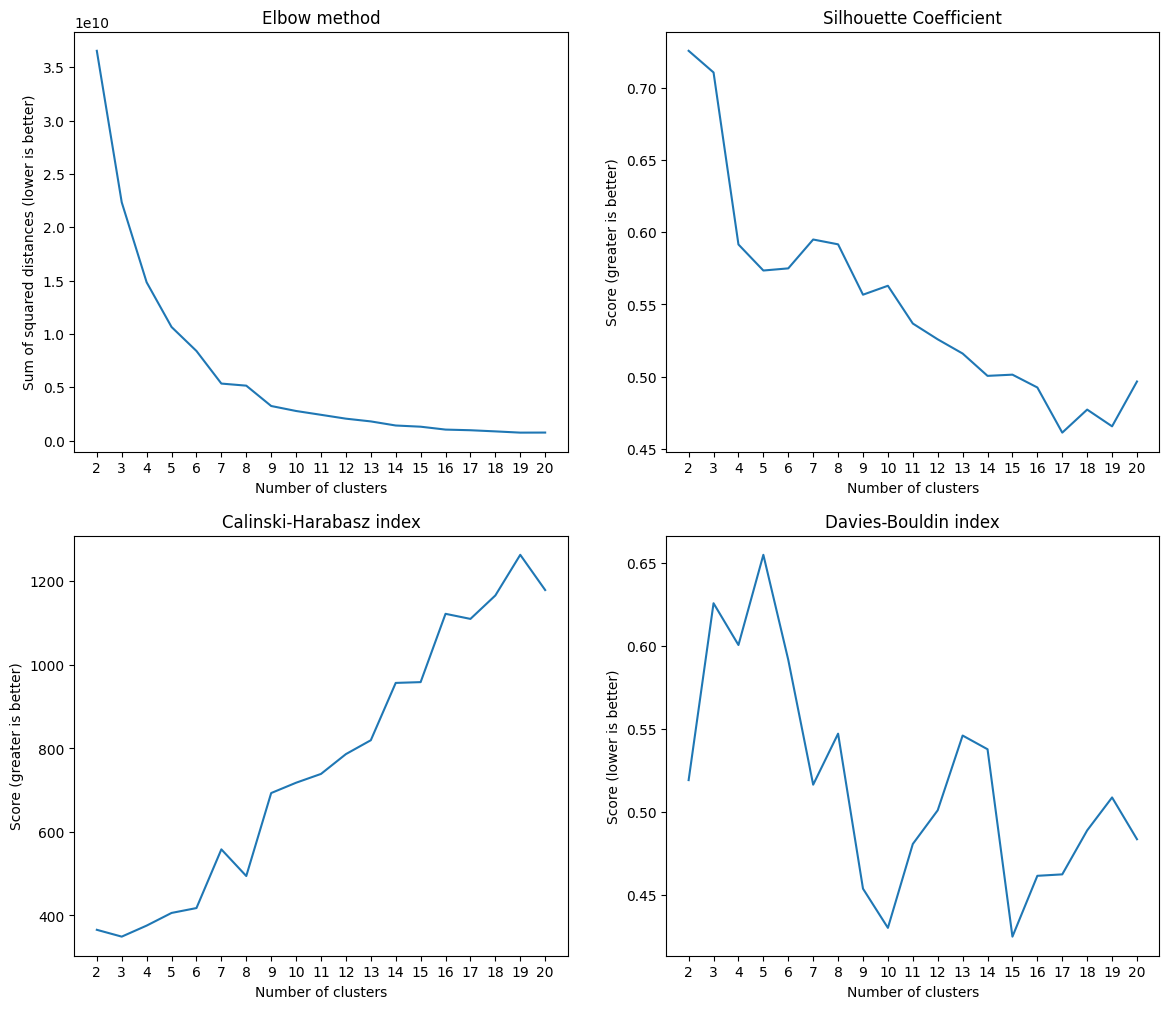

In [98]:
####### K-means #######
print('----- K-means -----')

kmeans = KMeans(n_clusters=10, n_init='auto').fit(points)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

print('Labels: ', clustering_labels)
print('Centers: ', centers)

plot_data(points, clustering_labels, 'K-Means')

# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(points)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, kmeans.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, kmeans.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')
axs[0][1].set_title('Silhouette Coefficient')
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')
axs[1][1].set_title('Davies-Bouldin index')
axs[1][1].set_xticks(ks)

plt.show()

###2. Repita lo anterior, pero con otro método de agrupamiento que elijas.

Labels:  [3 3 3 3 3 3 3 6 6 3 0 0 3 3 3 6 3 3 3 3 3 3 3 2 3 3 3 3 3 6 3 3 3 3 3 3 3
 3 3 3 3 3 0 0 6 3 3 3 3 0 3 3 3 6 6 3 3 3 6 3 0 3 3 3 3 3 3 3 6 3 3 3 3 6
 0 6 3 6 3 3 3 3 2 3 3 3 3 3 3 0 3 4 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 6
 0 3 3 1 0 3 3 3 3 3 3 0 5 3 3 3 3 0 3 3 3 3 2 0 0 3 3 0 0 3 3 3 3 6 1 3 3
 3 3 3 3 3 3 3 3 3 7 6 6 3 3 3 3 3 3 3]


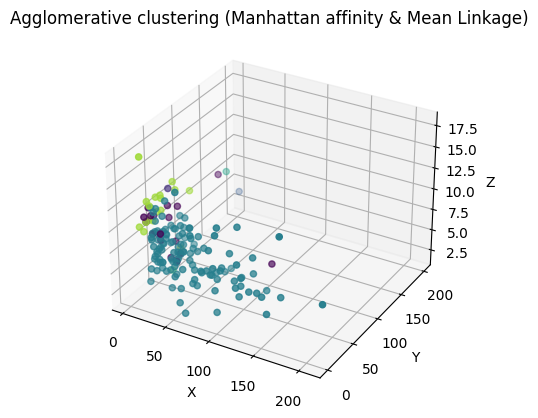

In [99]:
# Using custom distance matrix
dist = pairwise_distances(points, metric='l1')
agl = AgglomerativeClustering(n_clusters=8, linkage='average', metric='precomputed').fit(dist)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Agglomerative clustering (Manhattan affinity & Mean Linkage)')

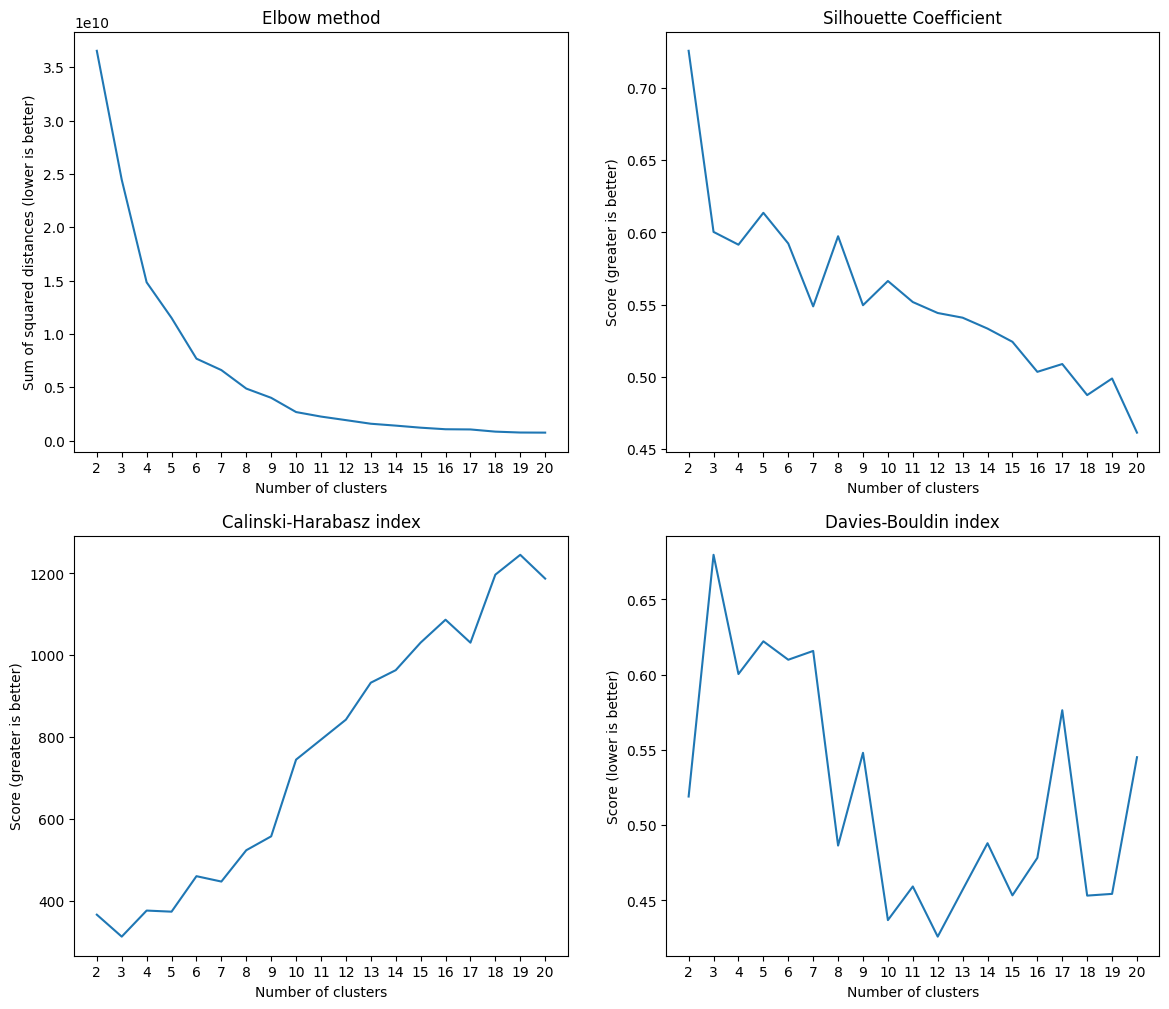

In [100]:
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(points)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, kmeans.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, kmeans.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')
axs[0][1].set_title('Silhouette Coefficient')
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')
axs[1][1].set_title('Davies-Bouldin index')
axs[1][1].set_xticks(ks)

plt.show()

###3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio. Algunos ejemplos de librerías son:


----- Dendrogram plot -----


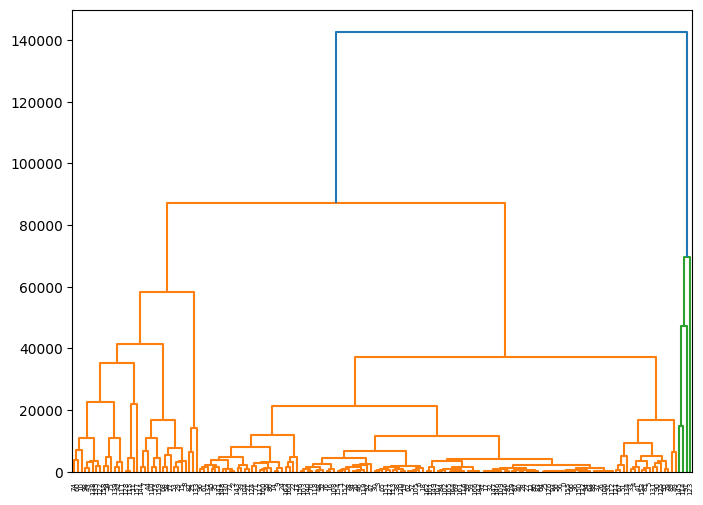

In [130]:
####### Dendrogram plot #######
print('----- Dendrogram plot -----')

linked = linkage(points, 'complete')
labelList = range(1, 11)

plt.figure(figsize=(8, 6))
dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.show()

In [104]:
!pip install sklearn-som

In [138]:
from sklearn_som.som import SOM

#Entrena una SOM con datos 'points' y realiza predicciones
data_som = SOM(m=3, n=1, dim=9)
data_som.fit(points)
predictions = data_som.predict(points)

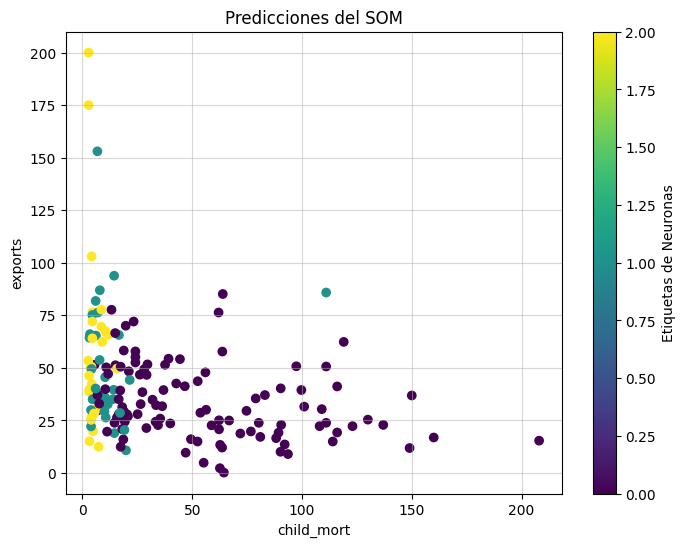

In [141]:
# Crea el gráfico de dispersión con colores
plt.figure(figsize=(8, 6))
scatter = plt.scatter(points[:, 0], points[:, 1], c=predictions, cmap='viridis')
plt.title('Predicciones del SOM')

# Agrega una leyenda
legend = plt.colorbar(scatter, label='Etiquetas de Neuronas')

# Activa el grid
plt.grid(True, alpha=0.5)

plt.xlabel('child_mort')
plt.ylabel('exports')

# Muestra el gráfico
plt.show()

###4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

*   Después de una investigación exhaustiva, se han categorizado los países en tres grupos distintos: Países Desarrollados, caracterizados por economías avanzadas y altos ingresos per cápita; Países en Desarrollo, que abarcan economías emergentes con niveles de ingresos per cápita más bajos; y Economías Emergentes, que están en proceso de transición hacia el desarrollo económico. En relación a los grupos formados y su vínculo con la mortalidad infantil, los resultados en su mayoría siguen las expectativas previas, demostrando que a medida que aumenta la actividad económica, la mortalidad infantil tiende a disminuir. Sin embargo, es relevante señalar que, al agregar más grupos, la complejidad aumenta, dificultando la comprensión de las diferencias entre cada uno, lo que podría dificultar la visualización clara de las relaciones. Por lo tanto, es importante considerar cuidadosamente la cantidad de grupos utilizados en futuros análisis para mantener la claridad en la interpretación de los datos.



In [143]:
!apt-get install -y texlive-xetex

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [144]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Aprendizaje/tecnicas_agrupamientoA01633784.ipynb' --output-dir='/content/drive/MyDrive/Colab Notebooks/Aprendizaje'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Aprendizaje/tecnicas_agrupamientoA01633784.ipynb to pdf
[NbConvertApp] Support files will be in tecnicas_agrupamientoA01633784_files/
[NbConvertApp] Making directory ./tecnicas_agrupamientoA01633784_files
[NbConvertApp] Making directory ./tecnicas_agrupamientoA01633784_files
[NbConvertApp] Making directory ./tecnicas_agrupamientoA01633784_files
[NbConvertApp] Making directory ./tecnicas_agrupamientoA01633784_files
[NbConvertApp] Making directory ./tecnicas_agrupamientoA01633784_files
[NbConvertApp] Making directory ./tecnicas_agrupamientoA01633784_files
[NbConvertApp] Making directory ./tecnicas_agrupamientoA01633784_files
[NbConvertApp] Writing 52600 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were 